In [911]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=400
import numpy as np
import random
scale=0.4
x1=np.random.normal(loc=[-1,1],scale=scale,size=[500,2])
x2=np.random.normal(loc=[1.5,1],scale=scale,size=[500,2])

In [912]:
x_train=[]
y_train=[]
for i in range(500):
    rand=random.random()
    new_sample=np.random.choice(500)
    if(rand<0.5):
        x_train.append(x1[new_sample]+random.random()*0.25-0.125)
        y_train.append(1)
    else:
        x_train.append(x2[new_sample]+random.random()*0.25-0.125)
        y_train.append(2)
x_train=np.array(x_train)
x_train_new=[]
for i in range(500):
    temp=np.array([1,x_train[i][0],x_train[i][1]])
    x_train_new.append(temp)
x_train=np.array(x_train_new)
y_train=np.array(y_train)
x_new=np.array(x_train)
for i in range(500):
    if(y_train[i]==2):
        x_new[i]=-x_new[i]

In [913]:
omega=np.matrix([[random.random()*50-50],[random.random()*100-50],[np.random.rand()*100-50]])

In [914]:
def gx(x_j):
    return omega.T*x_j

In [915]:
def train(x,max_iterations=100):
    step=1
    global omega
    J=0
    for i in range(len(x)):
        x_j=np.matrix([[x[i][0]],[x[i][1]],[x[i][2]]])
        g=gx(x_j)
        if(g<0):
            J-=g 
    print("Original penalty: ", J)
    keep=1
    iteration=0
    while(keep and iteration<max_iterations):
        plot_regions(x_train,y_train)
        keep=0
        for i in range(len(x)):
            x_j=np.matrix([[x[i][0]],[x[i][1]],[x[i][2]]])
            g=gx(x_j)
            if(g<0):
                keep=1
                step=float(np.abs(omega.T*x_j)/np.linalg.norm(x_j,ord=2))
                omega+=step*x_j
        J=0
        for i in range(len(x)):
            x_j=np.matrix([[x[i][0]],[x[i][1]],[x[i][2]]])
            g=gx(x_j)
            if(g<0):
                J-=g
        print(J)
        iteration+=1

In [916]:
np.linalg.norm(omega,ord=2)

55.267107680510044

In [917]:
def classify(x):
    outcome=[]
    for i in range(len(x)):
        x_j=np.matrix([[x[i][0]],[x[i][1]],[x[i][2]]])
        g=gx(x_j)
        if(g>0):
            outcome.append(1)
        else:
            outcome.append(2)
    return np.array(outcome)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Original penalty:  [[13224.02640421]]


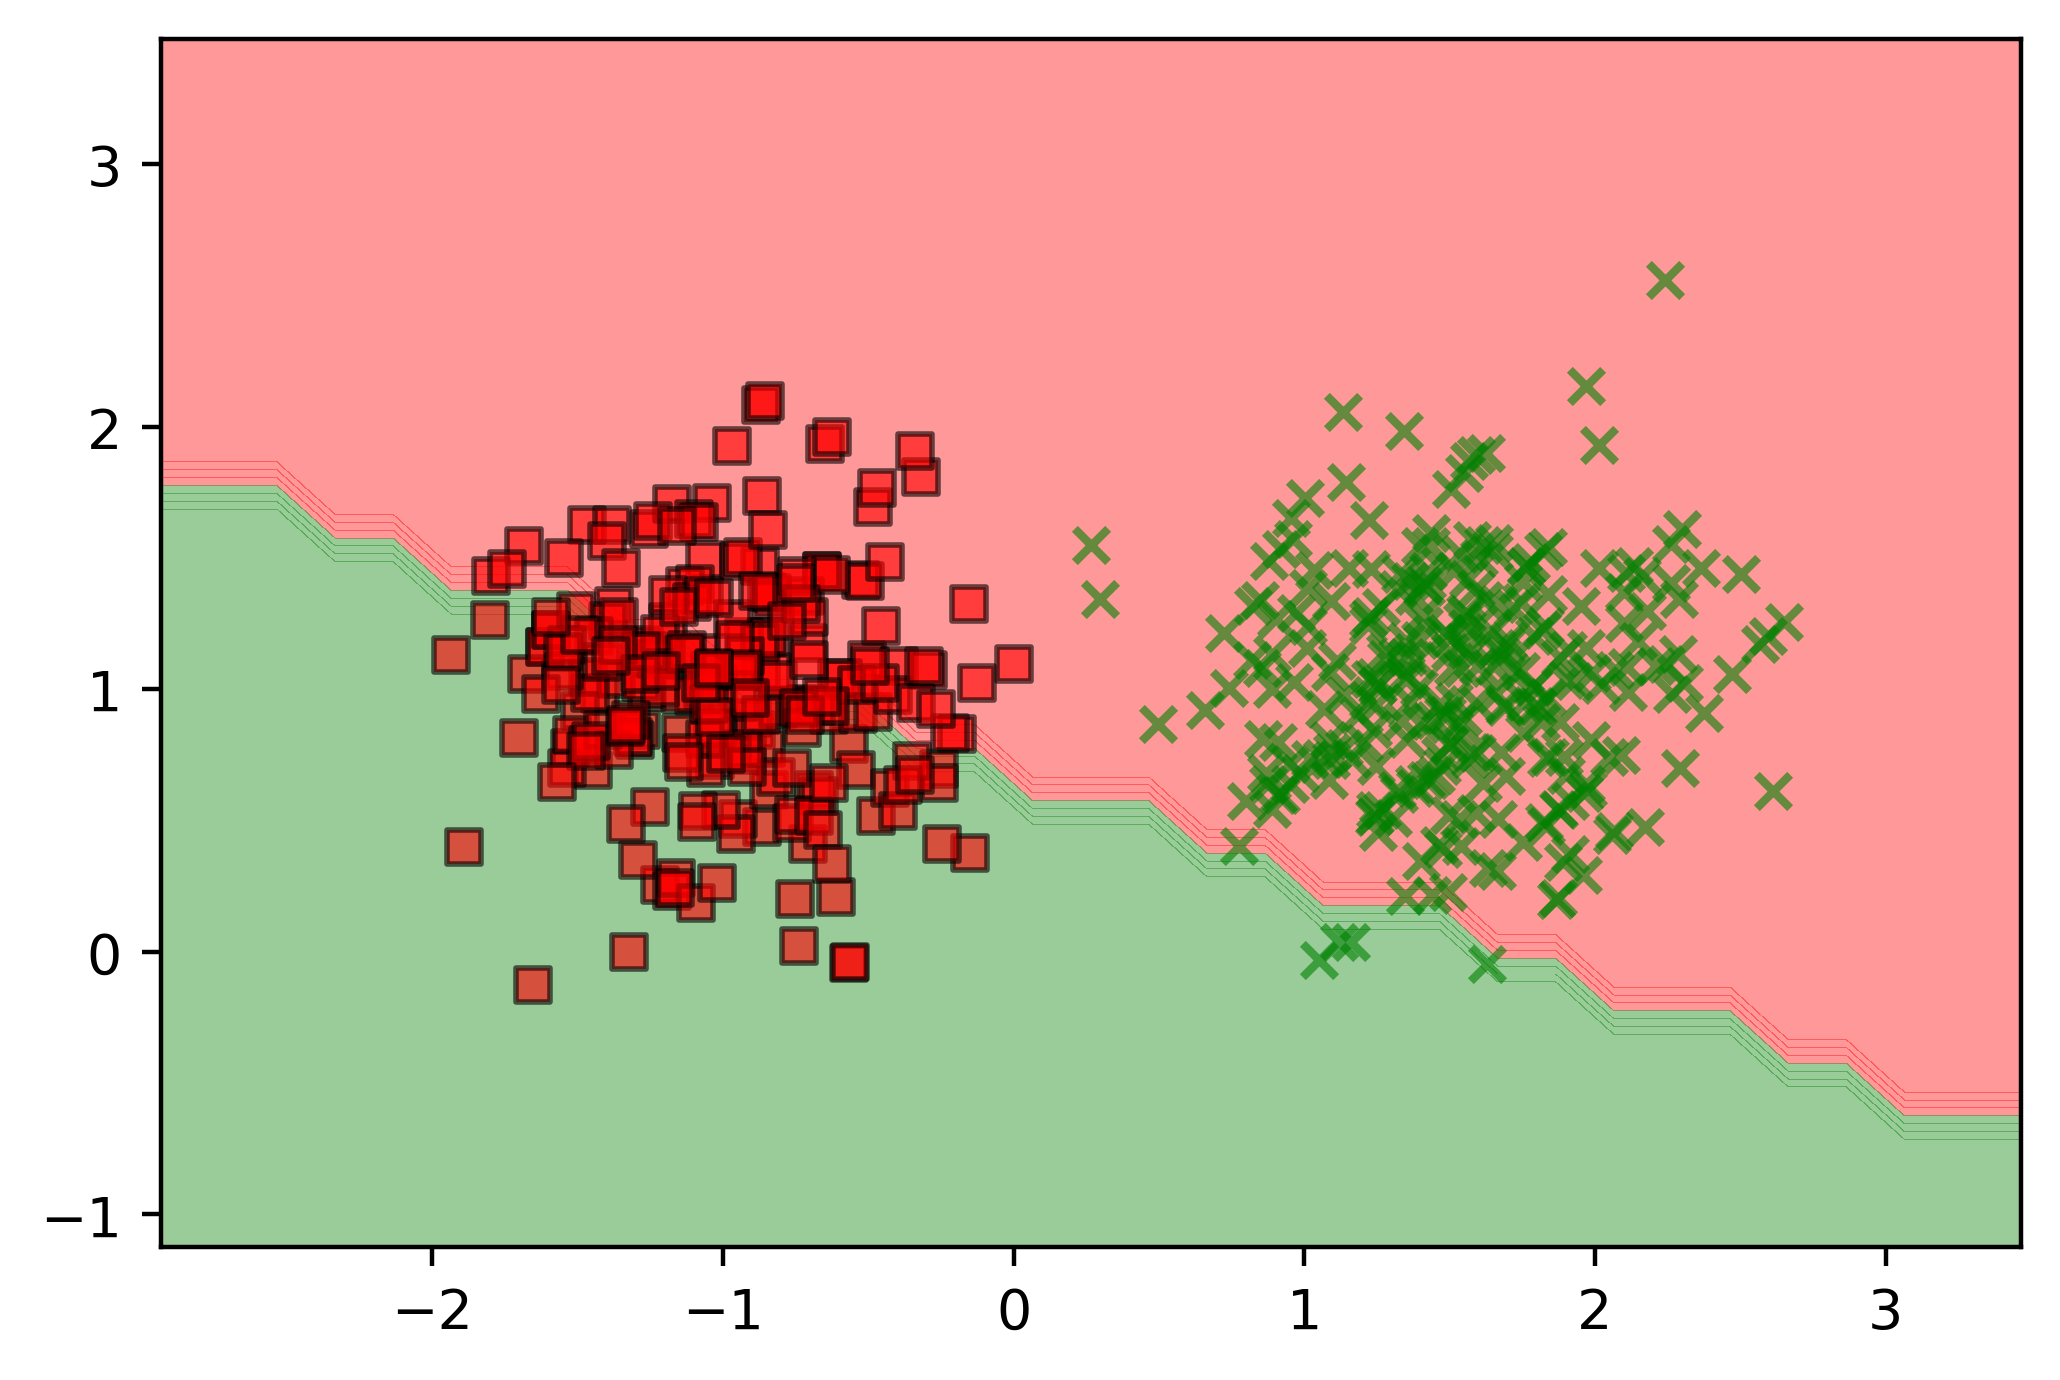

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[8.74359925]]


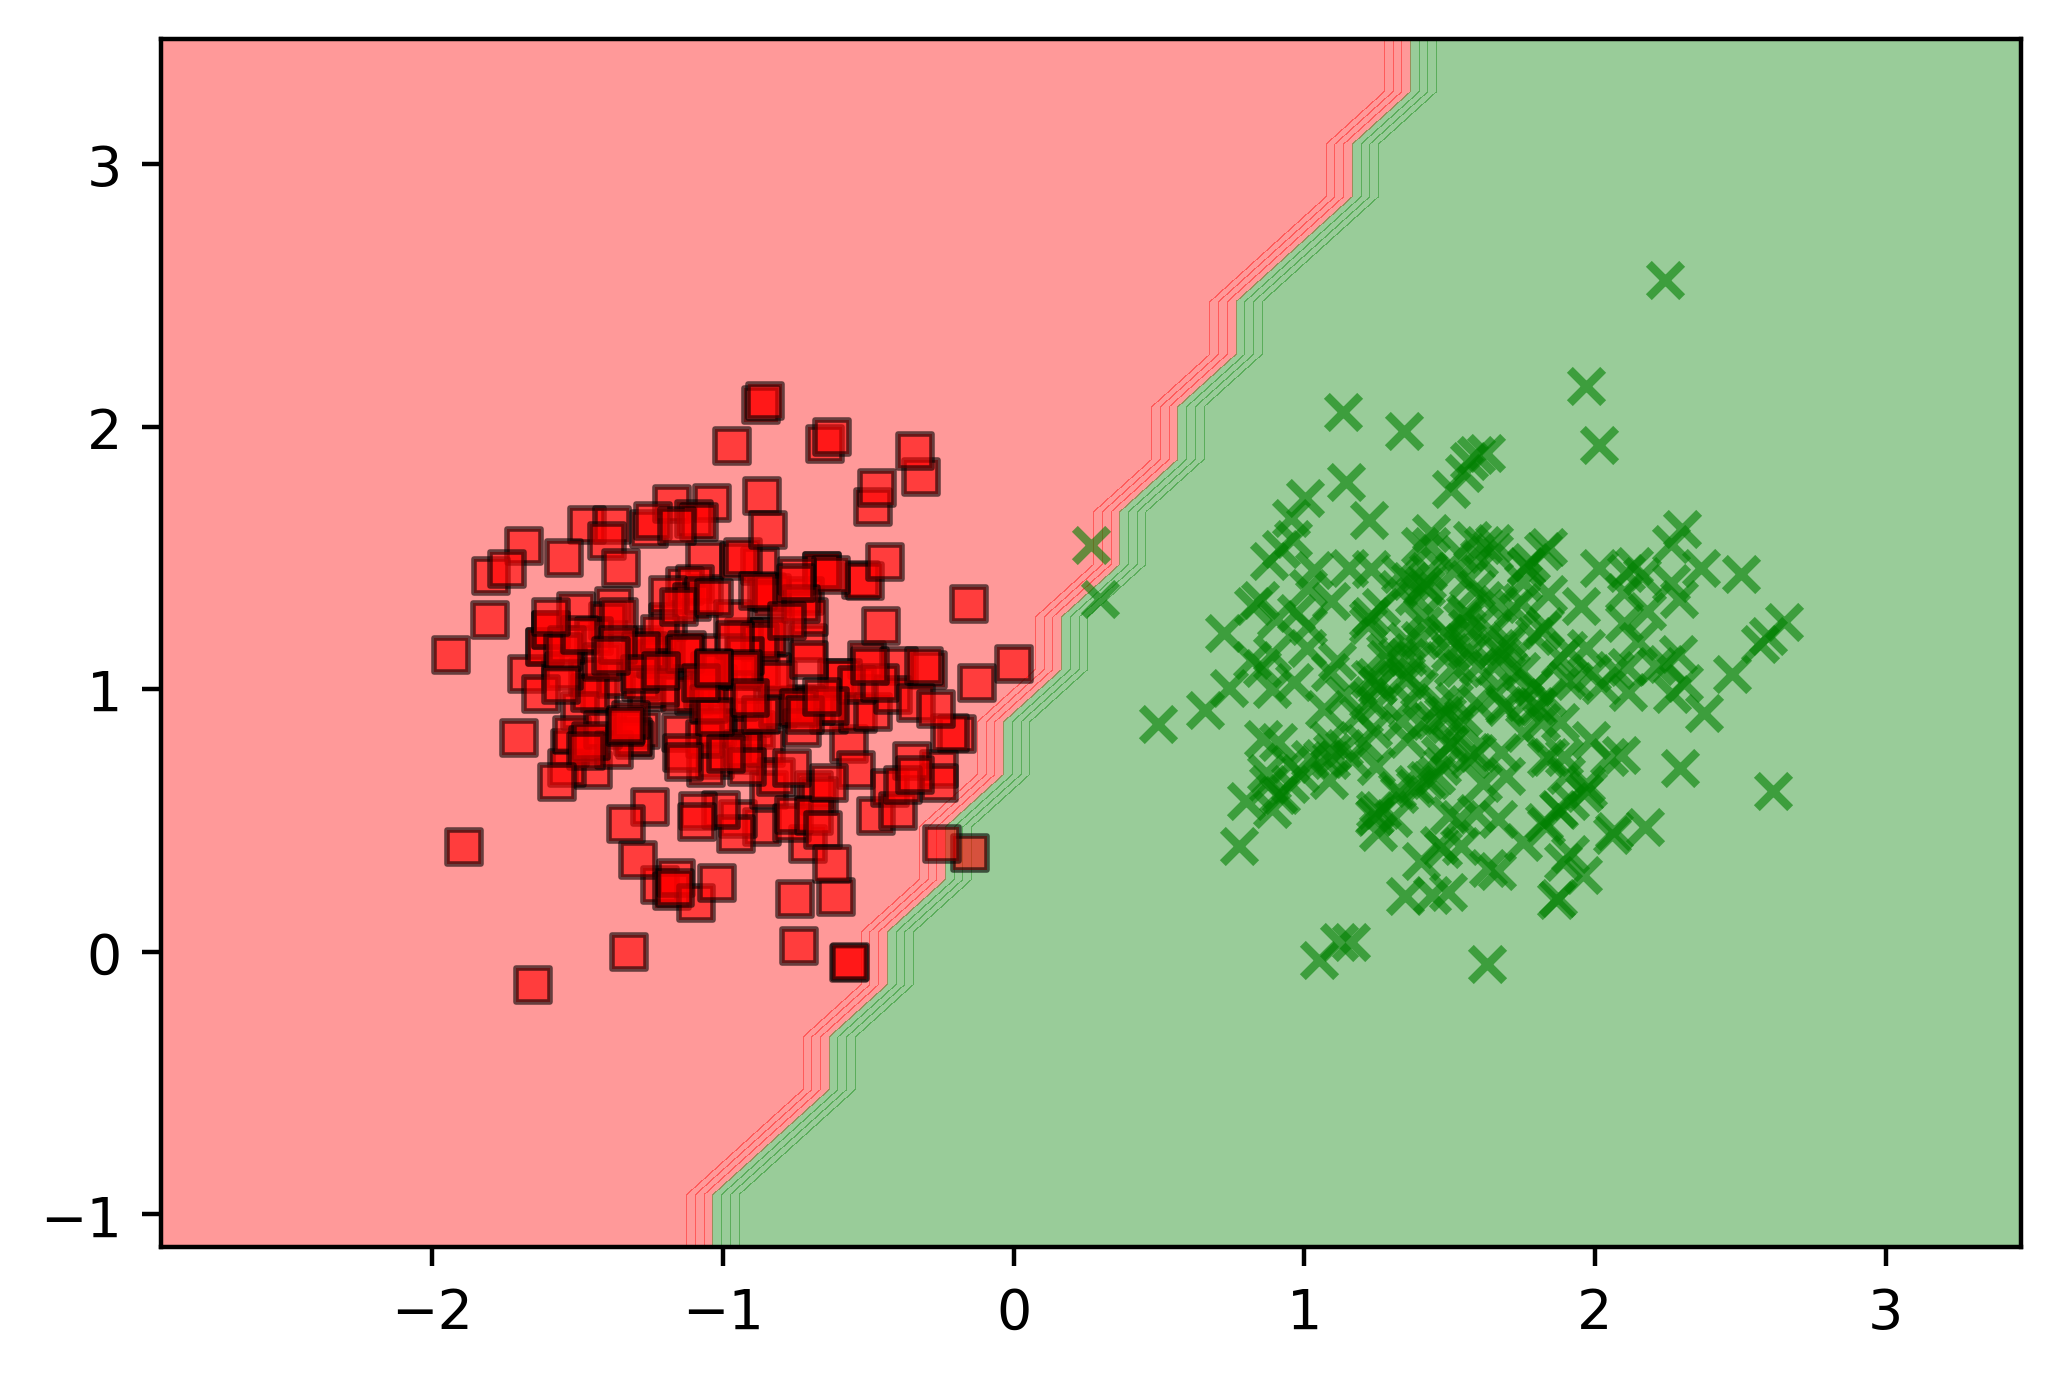

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[4.75540215]]


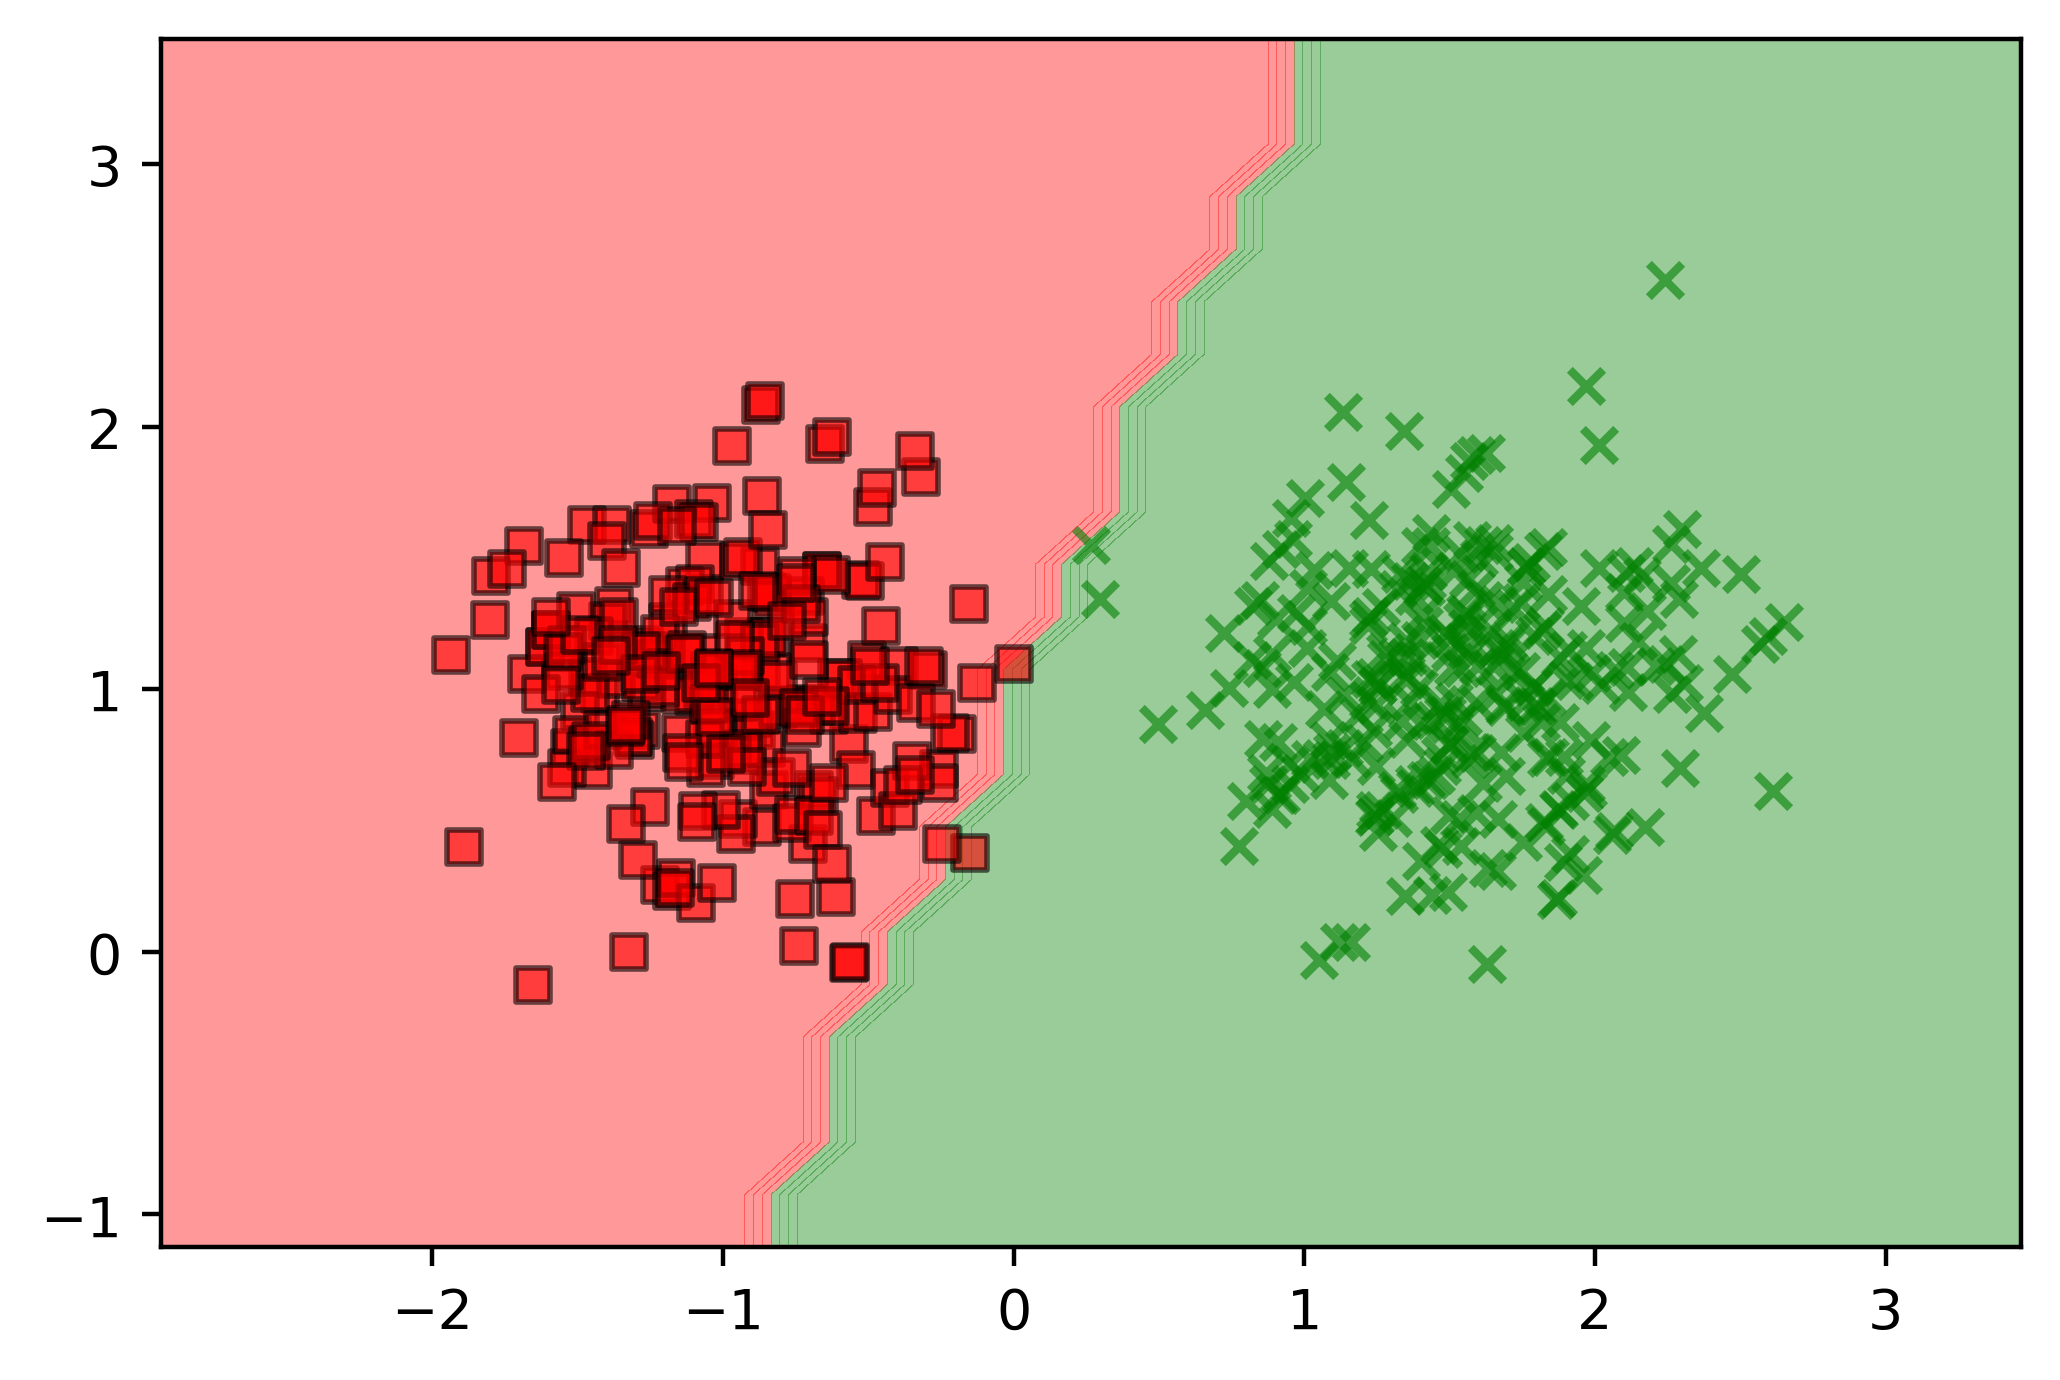

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[4.23842925]]


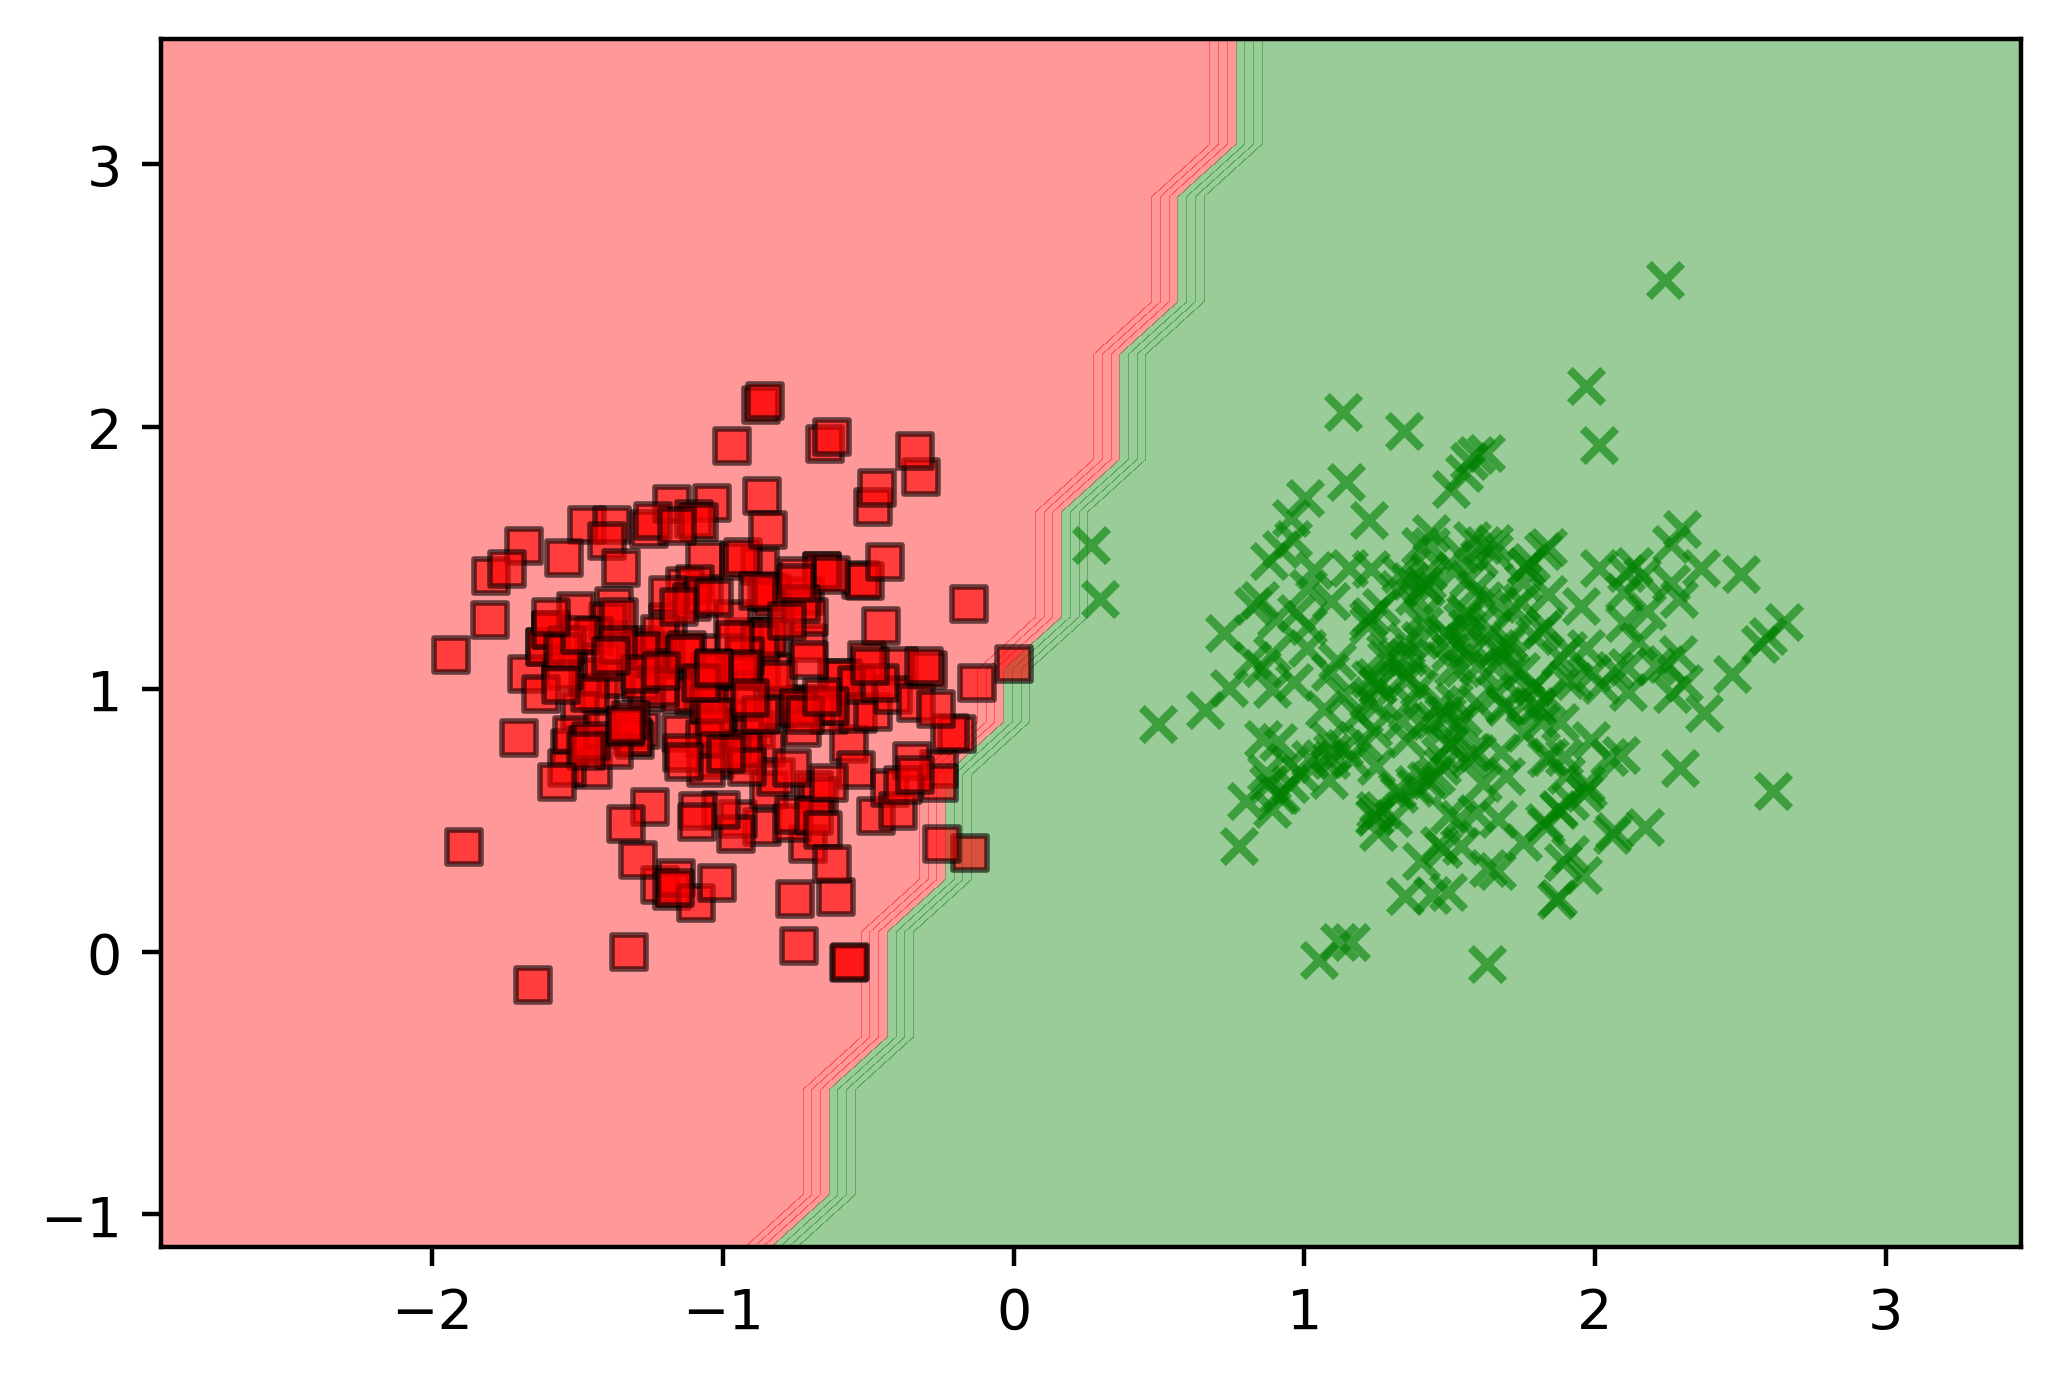

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[0.71107916]]


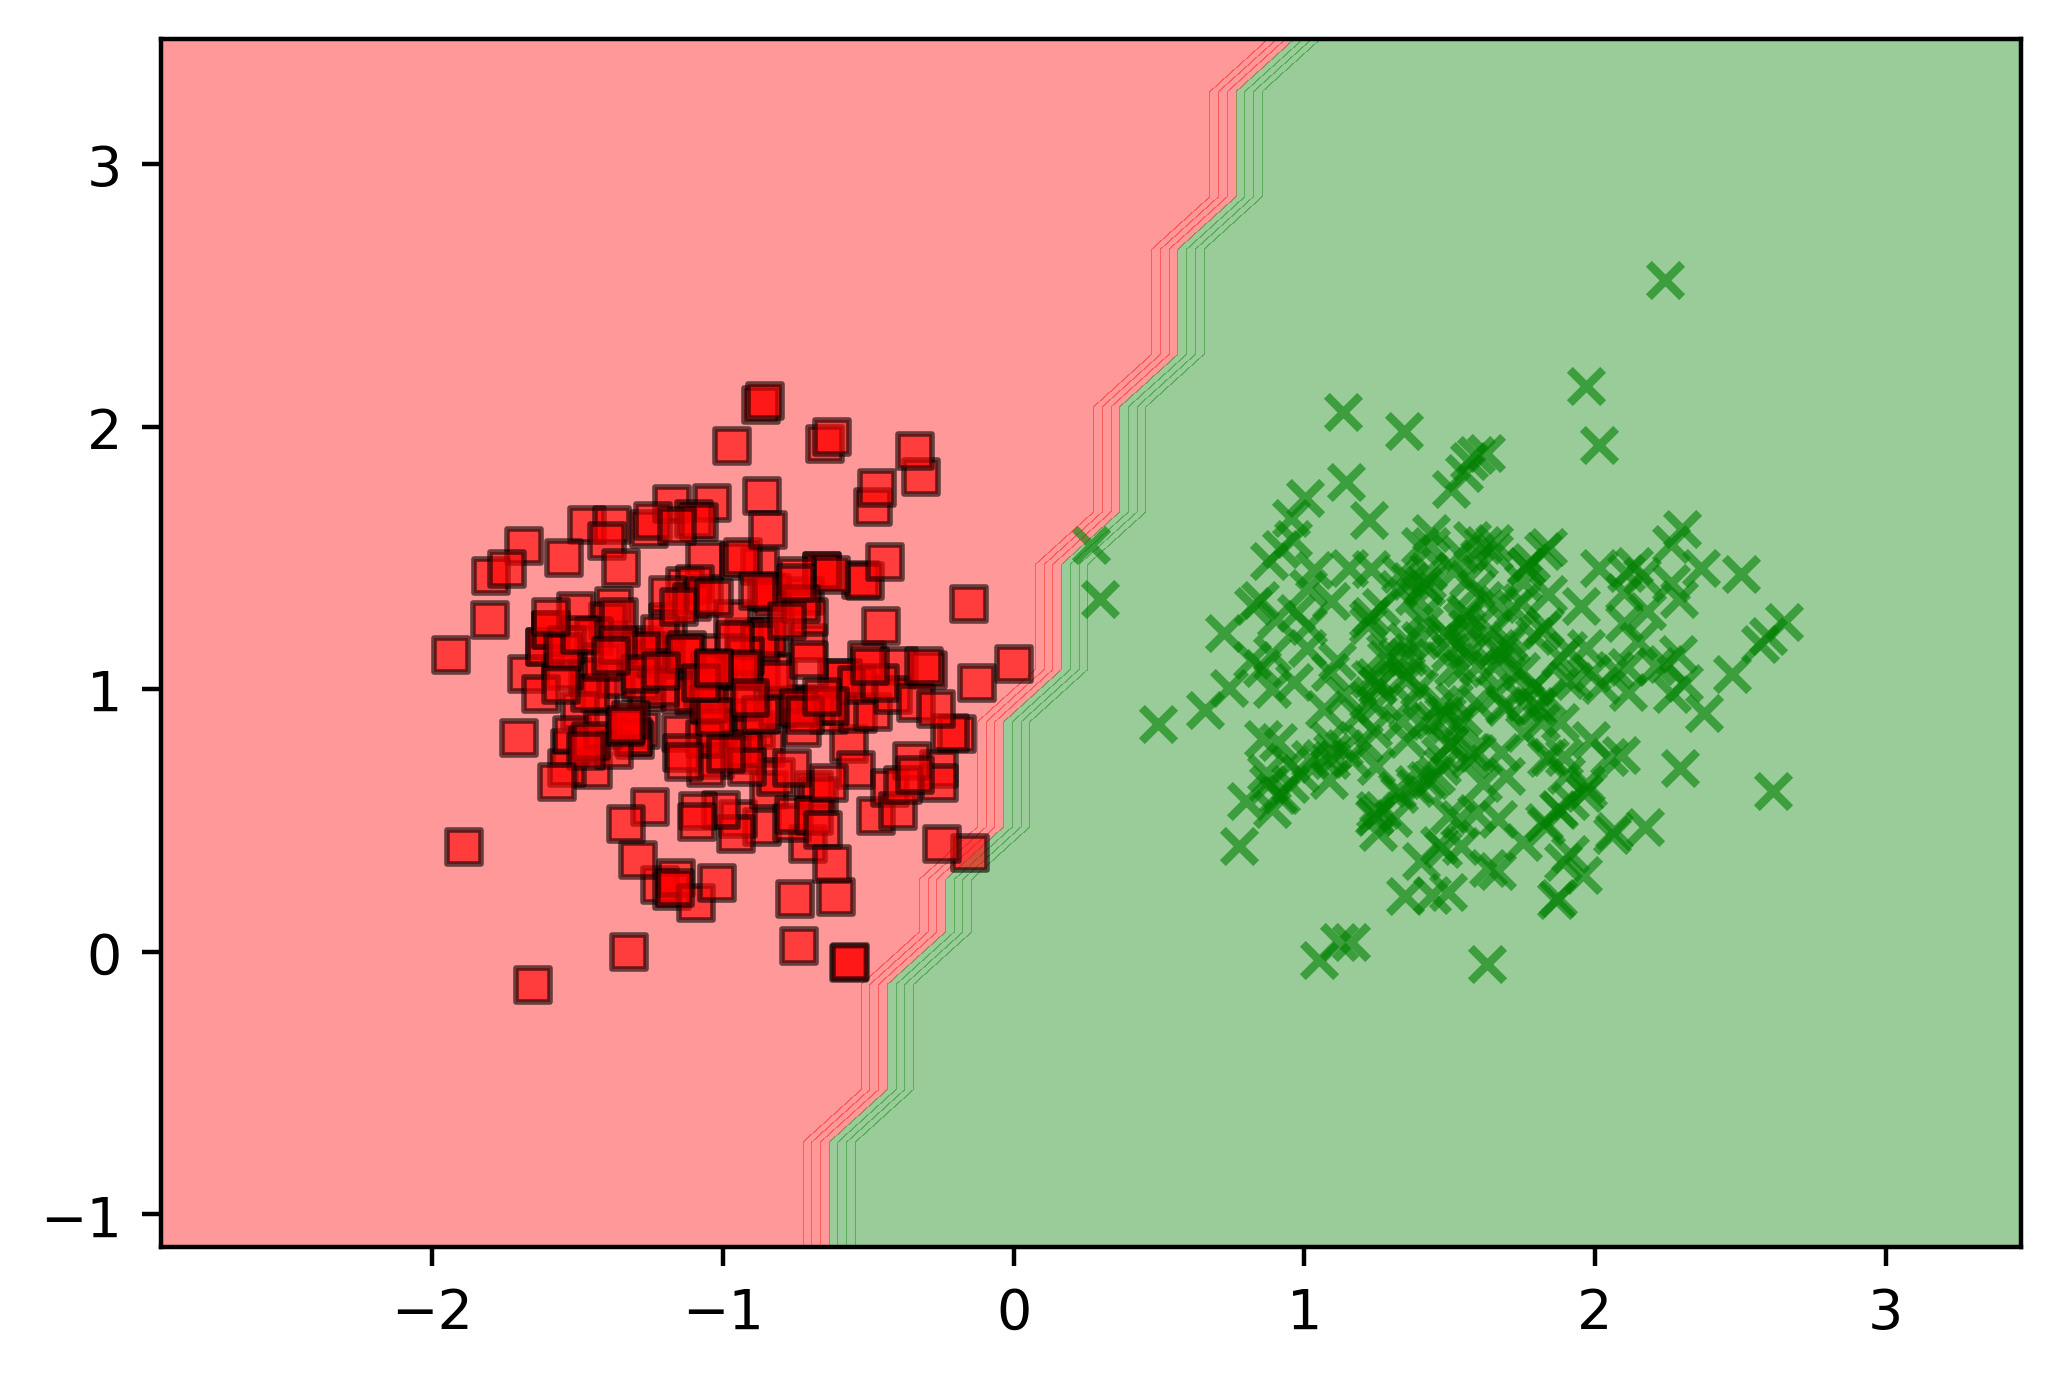

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0


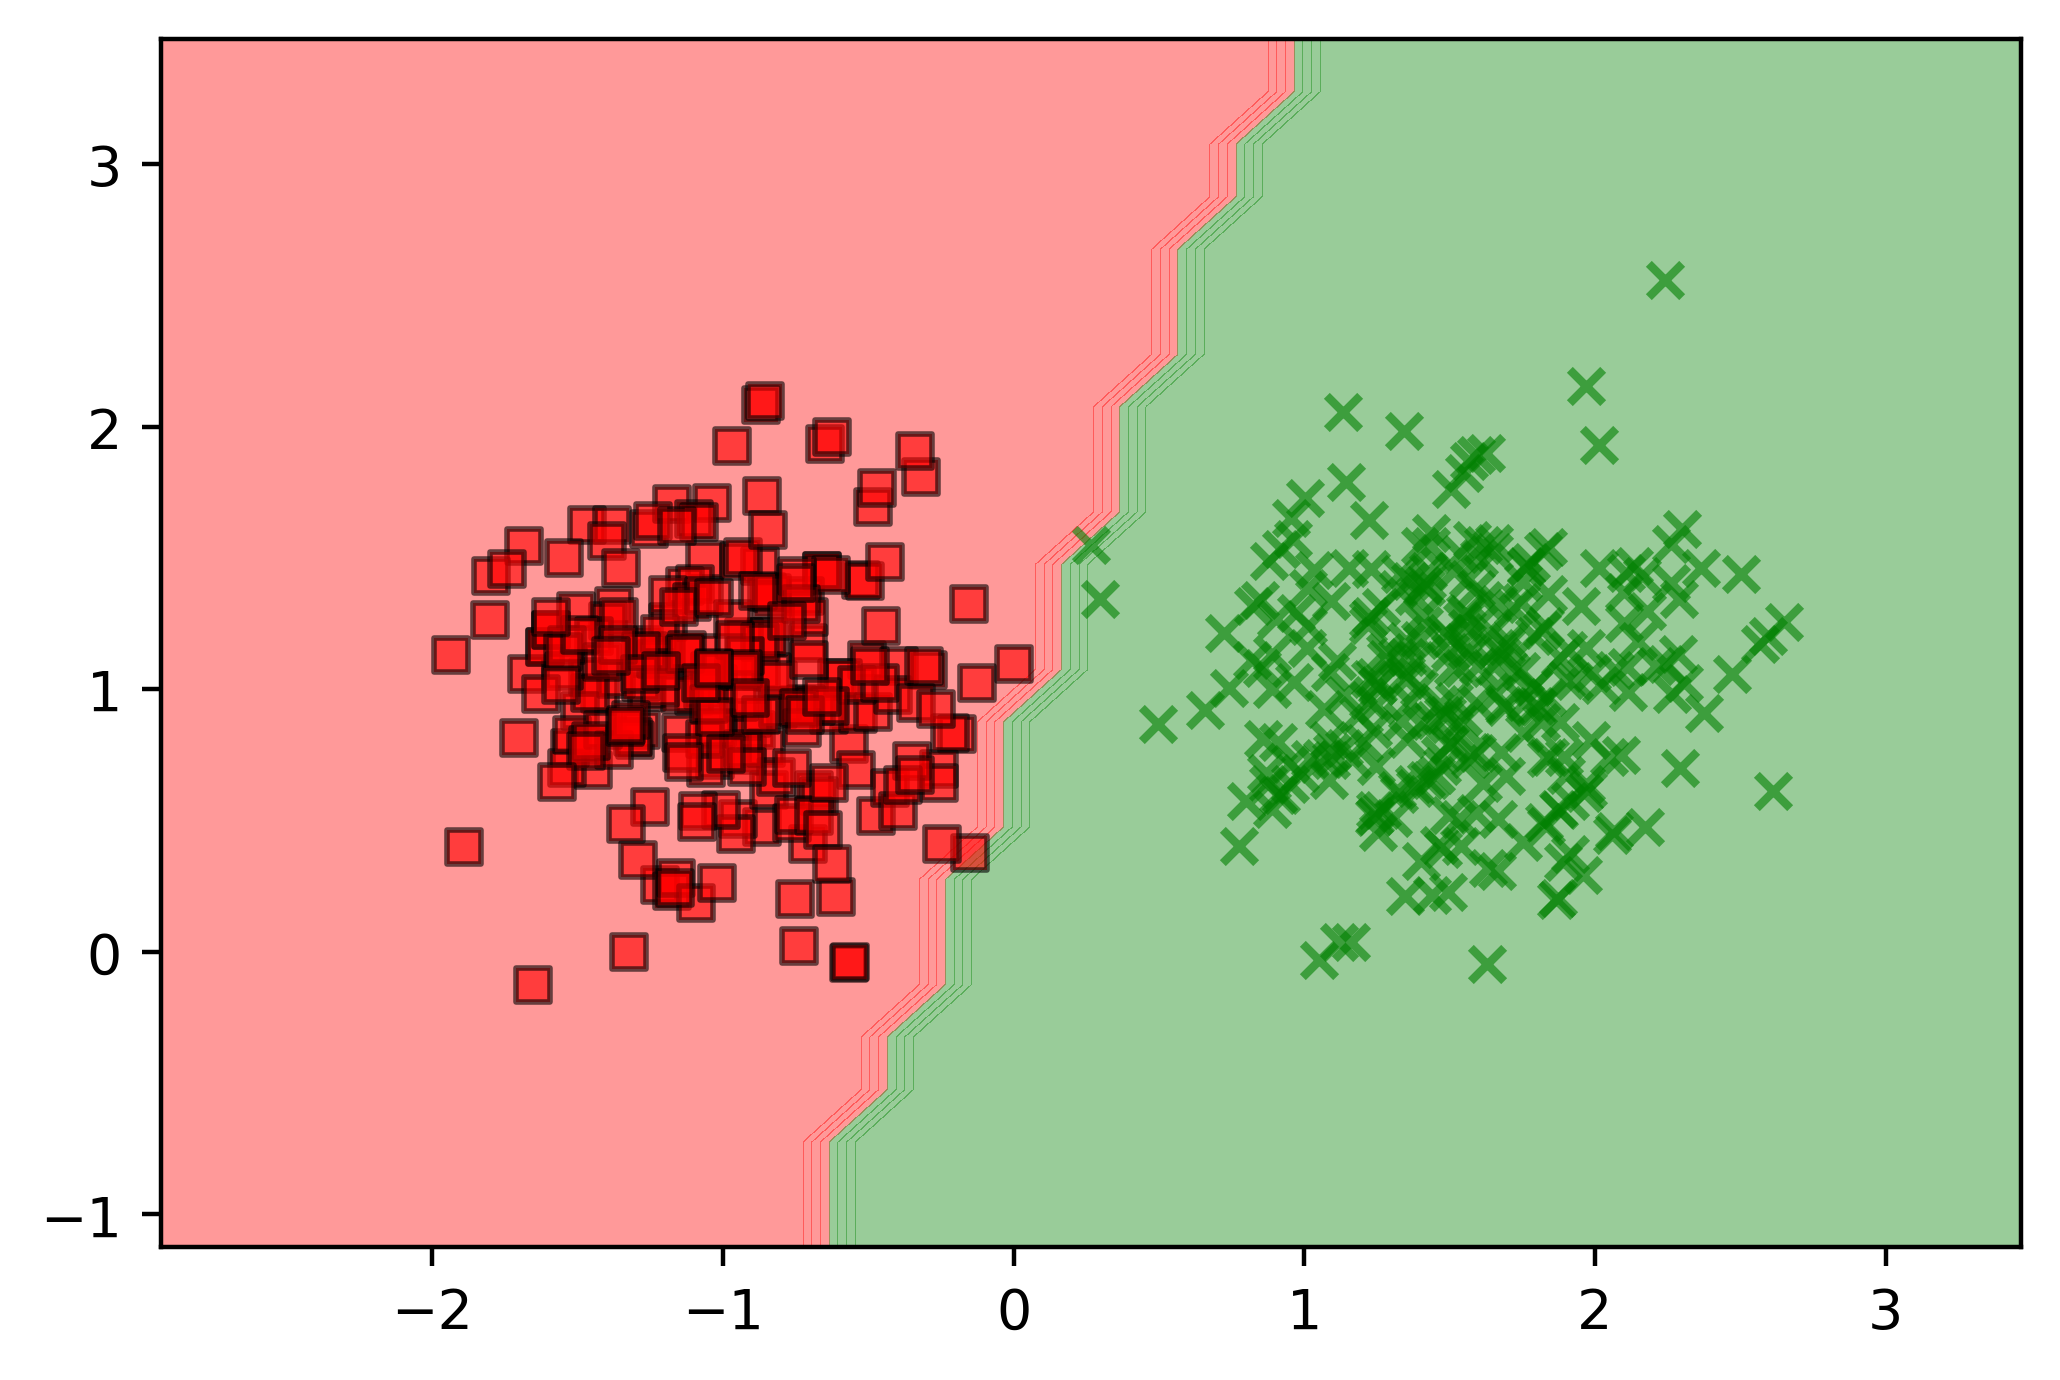

0


In [918]:
def plot_regions(x, y, resolution=0.2):
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['r', 'g', 'b', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x2_min, x2_max = x[:, 2].min() - 1, x[:, 2].max() + 1
    '''x1_min, x1_max =-2,2
    x2_min, x2_max =-2,2'''
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    alignment =[1]*len(xx1.ravel())
    alignment=np.array(alignment)
    z = classify(np.array([alignment,xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
 
    for idx, cc in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cc, 1],
                    y=x[y == cc, 2],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cc)
    plt.show()
train(x_new,max_iterations=200)
